# Importing libraries

In [ ]:
import numpy 
import matplotlib.pyplot as plt 
import seaborn as sns

import tensorflow as tf

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
# Size of dataset

print(f"Train Size : {len(x_train)}")
print(f"Test Size : {len(x_test)}")

Train Size : 50000
Test Size : 10000


In [ ]:
# Type of dataset

print(f"Train Type : {type(x_train)}")
print(f"Test Type : {type(x_test)}")

Train Type : <class 'numpy.ndarray'>
Test Type : <class 'numpy.ndarray'>


In [ ]:
# Dataset datatype

print(f"Train Type : {x_train.dtype}")
print(f"Test Type : {x_test.dtype}")

Train Type : uint8
Test Type : uint8


In [ ]:
# Shape of dataset

print(f"X shape : {x_train.shape}")
print(f"Y shape : {y_train.shape}")

X shape : (50000, 32, 32, 3)
Y shape : (50000, 1)


In [ ]:
# Unique values

print(f"Y Train : {set(y_train[:,0])}")
print(f"Y Test : {set(y_test[:,0])}")

Y Train : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Y Test : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Tensor Slices

In [ ]:
# Tensor Slice
trainTS = tf.data.Dataset.from_tensor_slices((x_train, y_train), name='train_data')
testTS = tf.data.Dataset.from_tensor_slices((x_test, y_test), name='test_data')

print(f"Training data type: {trainTS}")
print(f"Testing data type: {testTS}")

Training data type: <TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>
Testing data type: <TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>


In [ ]:
from tensorflow.keras.preprocessing import image as image_preprocessing
from tensorflow.keras.layers import RandomFlip, RandomZoom, RandomRotation, Rescaling

In [ ]:
# define operation
rescalingLayer = Rescaling(1/255, offset=0.0, name='rescaler')
rflipLayer = RandomFlip(mode="horizontal_and_vertical", seed=None)
rZoomLayer = RandomZoom(0.1, width_factor=0.05, fill_mode='reflect',
                        interpolation='bilinear', seed = None, fill_value = 0.0
)

rRotateLayer = RandomRotation(0.1, fill_mode='reflect', interpolation='bilinear', seed=None, fill_value=0.0)

In [ ]:
# List of layers
augLayers = [rescalingLayer, rflipLayer, rZoomLayer, rRotateLayer]

# Make apply each layer
for augType in augLayers:
    trainTS.map(lambda X,y: (augType(X), y))

#Standardizing data

In [ ]:
trainTS = trainTS.cache().shuffle(1024).batch(32).prefetch(tf.data.AUTOTUNE)
testTS = testTS.cache().batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
images.shape

(32, 32, 32, 3)

# Data Plot

In [ ]:
batch_size = 32
buffer_size = 1024
images, labels = next(trainTS.as_numpy_iterator())

In [ ]:
labelEncoderDict = { 0 : 'airplane',
                     1 : 'automobile',
                     2 : 'bird',
                     3 : 'cat',
                     4 : 'deer',
                     5 : 'dog',
                     6 : 'frog',
                     7 : 'horse',
                     8 : 'ship',
                     9 : 'truck'
}

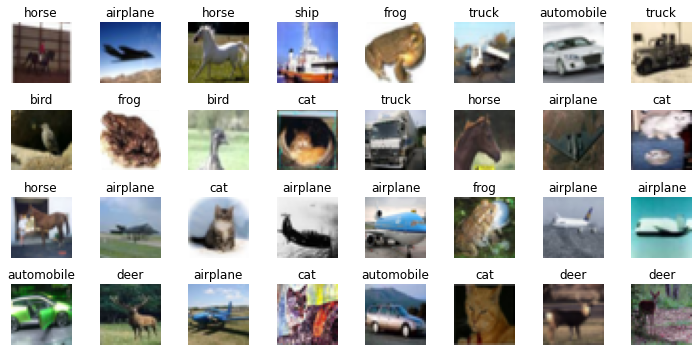

In [ ]:
plt.figure(figsize=(10, 5))

for index in range(batch_size):
    plt.subplot(4, 8, index+1)
    plt.imshow(images[index])    

    plt.title(str(labelEncoderDict[labels[index,0]]))
    plt.axis('off')

plt.tight_layout()
plt.show()

7

In [ ]:
cifar_model = tf.keras.models.Sequential(name='CifarModel')
cifar_model.add(tf.keras.layers.Conv2D(32, (3,3), (1,1), padding='valid', input_shape = (32,32,3)))
cifar_model.add(tf.keras.layers.Conv2D(32, (3,3), (1,1), padding='valid'))
cifar_model.add(tf.keras.layers.MaxPooling2D())

cifar_model.add(tf.keras.layers.Conv2D(32, (3,3), (1,1), padding='valid'))
cifar_model.add(tf.keras.layers.Conv2D(32, (3,3), (1,1), padding='valid'))
cifar_model.add(tf.keras.layers.MaxPooling2D())

cifar_model.add(tf.keras.layers.Flatten())
cifar_model.add(tf.keras.layers.Dense(1024))
cifar_model.add(tf.keras.layers.Dense(10,activation='softmax'))


In [ ]:
cifar_model.compile(optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
)

In [ ]:
cifar_model.summary()

Model: "CifarModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 conv2d_20 (Conv2D)          (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                    

In [ ]:
history = cifar_model.fit(x_train, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 24s 8ms/step - loss: 6.0105 - accuracy: 0.3977
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5933 - accuracy: 0.4840
Epoch 3/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4092 - accuracy: 0.5240
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3766 - accuracy: 0.5298
Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3837 - accuracy: 0.5287
Epoch 6/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3959 - accuracy: 0.5203
Epoch 7/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3756 - accuracy: 0.5271
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3478 - accuracy: 0.5393
Epoch 9/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3365 - accuracy: 0.5423
Epoch 10/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3095

In [ ]:
history2 = cifar_model.fit(trainTS, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2890 - accuracy: 0.5608
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2735 - accuracy: 0.5637
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2552 - accuracy: 0.5724
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2400 - accuracy: 0.5777
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2246 - accuracy: 0.5837
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2269 - accuracy: 0.5818
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2104 - accuracy: 0.5873
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2107 - accuracy: 0.5895
Epoch 9/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2048 - accuracy: 0.5916
Epoch 10/10
1563/1563 [==============================] - 12s 8ms/step - l